# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [112]:
path = 'D:/ML/Books/Learning_Pandas_russian_translation-1-master/pandas_exercises-master/pandas_exercises-master/Data/appl_1980_2014.csv'
data = pd.read_csv(path)
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.1+ KB


### Step 5. Transform the Date column as a datetime type

In [114]:
data['Date'] = pd.to_datetime(data['Date'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.1 KB


### Step 6.  Set the date as the index

In [115]:
data.set_index('Date',inplace=True)
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [116]:
print(data.index.duplicated().sum())
print(data.index.has_duplicates)

0
False


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [22]:
# It is a mistake as I've only changed Date sequence and haven't changed other values
# Good Lesson 
data.index = data.index[::-1]
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,96.27,96.80,93.92,95.35,65130000,95.35
1980-12-15,94.14,95.99,94.10,95.97,56305400,95.97
1980-12-16,93.67,94.10,93.20,94.03,22891800,94.03
1980-12-17,93.87,94.06,93.09,93.48,28420900,93.48
1980-12-18,93.52,94.07,93.13,93.52,38170200,93.52


In [122]:
data.sort_index(ascending=True,inplace=True)
data.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [121]:
data.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35


### Step 9. Get the last business day of each month

In [123]:
# My solution 
start_idx = data.index[0]
end_idx = data.index[-1]
freq = 'BM'
business_days = pd.date_range(start_idx,end_idx,freq=freq)
business_days

DatetimeIndex(['1980-12-31', '1981-01-30', '1981-02-27', '1981-03-31',
               '1981-04-30', '1981-05-29', '1981-06-30', '1981-07-31',
               '1981-08-31', '1981-09-30',
               ...
               '2013-09-30', '2013-10-31', '2013-11-29', '2013-12-31',
               '2014-01-31', '2014-02-28', '2014-03-31', '2014-04-30',
               '2014-05-30', '2014-06-30'],
              dtype='datetime64[ns]', length=403, freq='BM')

In [124]:
# Author's solution 
monthly_series = data.resample('BM').mean()
monthly_series.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


### Step 10.  What is the difference in days between the first day and the oldest

In [125]:
# My solution 
first_day = data.index[0]
last_day = data.index[-1]

diff = abs(first_day - last_day)
diff

Timedelta('12261 days 00:00:00')

In [126]:
# Author's solution 
(data.index.max() - data.index.min()).days

12261

### Step 11.  How many months in the data we have?

In [127]:
monthly_series = data.resample('BM').mean()
monthly_series.shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

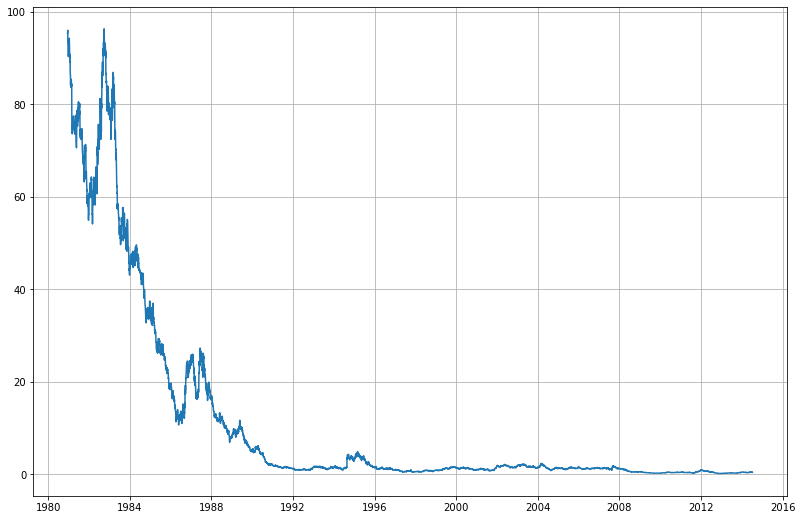

In [98]:
# My mistake 
plt.figure(figsize=(13.5,9))
plt.plot(data['Adj Close'])
plt.grid(True)

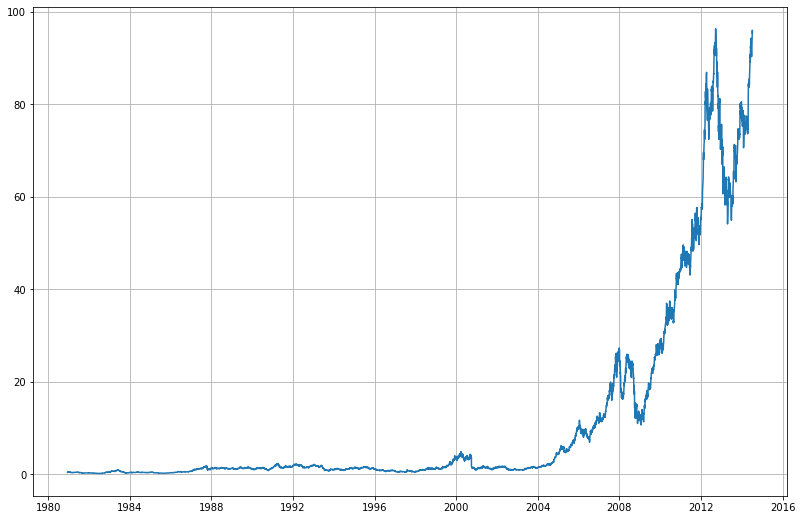

In [128]:
# Correct
plt.figure(figsize=(13.5,9))
plt.plot(data['Adj Close'])
plt.grid(True)